In [1]:
import pandas as pd
import csv
import pandas as pd
import numpy as np
import nltk
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm.auto import tqdm
tqdm.pandas()

from scipy.stats import ks_2samp
from IPython.core.display import display, HTML

In [4]:
information = pd.read_csv('question_nf_filename.txt', delimiter='|', encoding='utf-8')
information.columns = ['question_code', 'narrative_form','periodical_name']
information.columns = ['question_code', 'narrative_form','periodical_name']
information

question_code narrative_form  \
0          G01Q02             LB   
1          G01Q03            EX    
2        G01Q04             TR     
3          G01Q05            FP    
4          G01Q06             ??   
..            ...            ...   
268       G00Q266             MT   
269       G00Q267             MT   
270       G00Q268             FP   
271       G00Q269             MT   
272       G00Q270             LB   

                                       periodical_name  
0     1761-07-08_El-Duende-especulativo-sobre-la-vi...  
1     1761-09-05_El-Duende-especulativo-sobre-la-vi...  
2     1761-09-05_El-Duende-especulativo-sobre-la-vi...  
3      1761-09-26_El-Duende-especulativo-sobre-la-v...  
4     1761-07-27_El-Duende-especulativo-sobre-la-vi...  
..                                                 ...  
268  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
269  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
270  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
271  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-00...  
272  1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-01...  

[273 rows x 3 columns]

In [22]:
emotion_gold_1 = pd.read_csv('gold_standard_emotions.csv', delimiter=',', encoding='latin1')
emotion_gold_1

question_code                                           sentence  \
0         G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1         G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
2          G01Q8  No es chanza: la mayor parte de los hombres no...   
3         G01Q10  La lectura à que yo intento conduciros, solo p...   
4         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
5         G01Q13  Convencerá tal vez nuestro espiritu; pero poco...   
6         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
7         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
8         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
9         G01Q65                         ¡O miserables traductores!   
10        G01Q19  Y finalmente, que le traba como à hombre, para...   
11        G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
12        G01Q67  Señor Regañon: Como buen amante de la patria n...   
13        G01Q70  Pero en obsequio de la verdad debo decir, que ...   
14        G01Q23  Otra semana sabrèmos los demás articulos de es...   
15        G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
16        G00Q55  Reynaba en todos el contento, y el ayre resona...   
17        G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
18        G00Q64                     Es una vergüenza, un escándalo   
19        G00Q72  No puedo sufrir ver hacer actos de virtud y de...   
20        G00Q80  No puedo menos de irritarme al oir semejantes ...   
21        G00Q84  Que yo pobre de mí me veía lánguido y estenuad...   
22       G00Q117  No hay peor compañia, que la de ancianos encap...   
23       G00Q121  Los que llamamos Poderosos, viven en una esple...   
24       G00Q126  Está capáz de entristecer à la compañia mas al...   
25       G00Q133  Pero todo esto es inutil, y èl ha hallado el m...   
26       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...   
27       G00Q142  Algunas veces me contento con arquear las ceja...   
28       G00Q143  Muriò en mis brazos, y en el desorden, en que ...   
29       G00Q152                          ¡què mal lo conoce V. M.!   
30       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...   
31       G00Q171  ¡valgate Dios por nombre, que aún assi engendr...   
32       G00Q174  Lucio es un ingrato, es un Hombre, que entrega...   
33       G00Q176  Tenía muchissima confianza de mi, como que se ...   
34       G00Q179  Estas fingidas esperanzas, y las importunas po...   
35       G00Q184  Señora Culta, su Carta es un farrago de los ma...   
36       G00Q185  Yo por mi desgracia me hallo Casada con un Cur...   
37       G00Q205  Se le presentaba siempre lleno el semblante de...   
38       G00Q206  Y estos mismos amigos le miran con indiferenci...   
39       G00Q210  pero un accidente peor para mí que una buena e...   
40       G00Q190  De aqui es que no hablará una palabra en asunt...   
41       G00Q191  Tal qual diamantillo tiene; pero lo demás son ...   
42       G00Q215  A mí me hizo reir este ofrecimiento, mas no as...   
43       G00Q216  Es un cobarde, un vil, un indigno de los honor...   
44       G00Q227  ¡Qué delicia no sería oirlas entonar con sus e...   
45       G00Q231  y como nadie hasta ahora se habia acordado de ...   
46       G00Q232  Una cosa semejante creen ellos que ha de suced...   
47       G00Q234  La miseria iba á oprimirme, y no me quedaba ya...   
48       G00Q238  Le hemos manifestado varias veces quán impropi...   
49       G00Q244  antes mas me le afeminaron, y era tal el temor...   
50       G00Q253  Mas yo no sé como entorpecidas por una especie...   
51       G00Q257  La aurora de un nuevo periódico se presenta ap...   

      annotation  
0          anger  
1        disgust  
2       surprise  
3          trust  
4           fear  
5          trust  
6        disgust  
7       surprise  
8            joy  
9          anger  
10         trust  
11       di

In [23]:
pd.set_option('display.max_rows', 500)


In [24]:
polarity_gold_1 = pd.read_csv('gold_standard_polarities.csv', delimiter=',', encoding='latin1')
polarity_gold_1

question_code                                           sentence  \
0          G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
2          G01Q03  Matò à un Joven por haver murmurado de la cond...   
3          G01Q04  Pero no havia pisado sus umbrales, quando la D...   
4          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
5          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
6          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
7          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
8          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
9           G01Q8  No es chanza: la mayor parte de los hombres no...   
10         G01Q52  Y ha de saber Vm. que por la vanidad de estas ...   
11         G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
12          G01Q9  El amor, que todos tenemos à la libertad, impe...   
13         G01Q10  La lectura à que yo intento conduciros, solo p...   
14         G01Q55  No nos desviamos de la verdad si comparamos á ...   
15         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
16         G01Q14  Una muger hermosa, y entendida nos convence ca...   
17         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
18         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
19         G01Q59  A una persona de esta cláse, se le oirá decir ...   
20         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
21         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
22         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
23         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
24         G01Q63  Poco habia yo andado por esta morada, quando v...   
25         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
26         G01Q65                         ¡O miserables traductores!   
27         G01Q19  Y finalmente, que le traba como à hombre, para...   
28         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
29         G01Q67  Señor Regañon: Como buen amante de la patria n...   
30         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
31         G01Q69  Todavía por nuestra desgracia no se han acabad...   
32         G01Q71     El siguiente nos darà una breve idèa del amor.   
33         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
34         G01Q23  Otra semana sabrèmos los demás articulos de es...   
35         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
36         G01Q25     El cuento es breve; no sé si será compendioso.   
37         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
38         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
39         G00Q54  En una palabra, Señores: lo que antes sería oc...   
40         G00Q55  Reynaba en todos el contento, y el ayre resona...   
41         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
42         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
43         G00Q59  En esa calle que atraviesa, número 6. quarto p...   
44         G00Q60  No crea Vmd. amigo mio, que lo que habló ese s...   
45         G00Q61  Tal es la elegante composicion poética que inc...   
46         G00Q62  Mis cabellos son mas obscuros que el corazon d...   
47         G00Q64                     Es una vergüenza, un escándalo   
48         G00Q65  ¿Hé de verme yo obligada hasta la muerte (que ...   
49         G00Q66  ¡Cómo podré sufrir las finezas de la obligacio...   
50         G00Q67  Donde el frio es excesivo y no permite á los A...   
51         G00Q68  Nada tengo de zeloso, y antes me fastidian not...   
52         G00Q69  Semejantes al perro de la fabula, que suelta e...   
53         G00Q70  El leon sabiamente ocupado en dar curso á obje...   
54         G00Q71  Pruebolo asi (continué yo

In [25]:
gold = pd.merge(polarity_gold_1, emotion_gold_1, on=['question_code','sentence'], how='outer')
gold

question_code                                           sentence  \
0          G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
2          G01Q03  Matò à un Joven por haver murmurado de la cond...   
3          G01Q04  Pero no havia pisado sus umbrales, quando la D...   
4          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
5          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
6          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
7          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
8          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
9           G01Q8  No es chanza: la mayor parte de los hombres no...   
10         G01Q52  Y ha de saber Vm. que por la vanidad de estas ...   
11         G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
12          G01Q9  El amor, que todos tenemos à la libertad, impe...   
13         G01Q10  La lectura à que yo intento conduciros, solo p...   
14         G01Q55  No nos desviamos de la verdad si comparamos á ...   
15         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
16         G01Q14  Una muger hermosa, y entendida nos convence ca...   
17         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
18         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
19         G01Q59  A una persona de esta cláse, se le oirá decir ...   
20         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
21         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
22         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
23         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
24         G01Q63  Poco habia yo andado por esta morada, quando v...   
25         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
26         G01Q65                         ¡O miserables traductores!   
27         G01Q19  Y finalmente, que le traba como à hombre, para...   
28         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
29         G01Q67  Señor Regañon: Como buen amante de la patria n...   
30         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
31         G01Q69  Todavía por nuestra desgracia no se han acabad...   
32         G01Q71     El siguiente nos darà una breve idèa del amor.   
33         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
34         G01Q23  Otra semana sabrèmos los demás articulos de es...   
35         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
36         G01Q25     El cuento es breve; no sé si será compendioso.   
37         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
38         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
39         G00Q54  En una palabra, Señores: lo que antes sería oc...   
40         G00Q55  Reynaba en todos el contento, y el ayre resona...   
41         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
42         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
43         G00Q59  En esa calle que atraviesa, número 6. quarto p...   
44         G00Q60  No crea Vmd. amigo mio, que lo que habló ese s...   
45         G00Q61  Tal es la elegante composicion poética que inc...   
46         G00Q62  Mis cabellos son mas obscuros que el corazon d...   
47         G00Q64                     Es una vergüenza, un escándalo   
48         G00Q65  ¿Hé de verme yo obligada hasta la muerte (que ...   
49         G00Q66  ¡Cómo podré sufrir las finezas de la obligacio...   
50         G00Q67  Donde el frio es excesivo y no permite á los A...   
51         G00Q68  Nada tengo de zeloso, y antes me fastidian not...   
52         G00Q69  Semejantes al perro de la fabula, que suelta e...   
53         G00Q70  El leon sabiamente ocupado en dar curso á obje...   
54         G00Q71  Pruebolo asi (continué yo

In [26]:
gold = gold.rename(columns={'annotation_x': 'polarity_annotation', 'annotation_y': 'emotion_annotation'})


In [28]:
gold[['polarity_annotation', 'emotion_annotation']] = gold[['polarity_annotation', 'emotion_annotation']].fillna('no_agreement')
gold


question_code                                           sentence  \
0          G01Q01  Mi pobre Vecino, posseìdo de una furiosa frene...   
1          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
2          G01Q03  Matò à un Joven por haver murmurado de la cond...   
3          G01Q04  Pero no havia pisado sus umbrales, quando la D...   
4          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
5          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
6          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
7          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
8          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
9           G01Q8  No es chanza: la mayor parte de los hombres no...   
10         G01Q52  Y ha de saber Vm. que por la vanidad de estas ...   
11         G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
12          G01Q9  El amor, que todos tenemos à la libertad, impe...   
13         G01Q10  La lectura à que yo intento conduciros, solo p...   
14         G01Q55  No nos desviamos de la verdad si comparamos á ...   
15         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
16         G01Q14  Una muger hermosa, y entendida nos convence ca...   
17         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
18         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
19         G01Q59  A una persona de esta cláse, se le oirá decir ...   
20         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
21         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
22         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
23         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
24         G01Q63  Poco habia yo andado por esta morada, quando v...   
25         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
26         G01Q65                         ¡O miserables traductores!   
27         G01Q19  Y finalmente, que le traba como à hombre, para...   
28         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
29         G01Q67  Señor Regañon: Como buen amante de la patria n...   
30         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
31         G01Q69  Todavía por nuestra desgracia no se han acabad...   
32         G01Q71     El siguiente nos darà una breve idèa del amor.   
33         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
34         G01Q23  Otra semana sabrèmos los demás articulos de es...   
35         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
36         G01Q25     El cuento es breve; no sé si será compendioso.   
37         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
38         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
39         G00Q54  En una palabra, Señores: lo que antes sería oc...   
40         G00Q55  Reynaba en todos el contento, y el ayre resona...   
41         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
42         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
43         G00Q59  En esa calle que atraviesa, número 6. quarto p...   
44         G00Q60  No crea Vmd. amigo mio, que lo que habló ese s...   
45         G00Q61  Tal es la elegante composicion poética que inc...   
46         G00Q62  Mis cabellos son mas obscuros que el corazon d...   
47         G00Q64                     Es una vergüenza, un escándalo   
48         G00Q65  ¿Hé de verme yo obligada hasta la muerte (que ...   
49         G00Q66  ¡Cómo podré sufrir las finezas de la obligacio...   
50         G00Q67  Donde el frio es excesivo y no permite á los A...   
51         G00Q68  Nada tengo de zeloso, y antes me fastidian not...   
52         G00Q69  Semejantes al perro de la fabula, que suelta e...   
53         G00Q70  El leon sabiamente ocupado en dar curso á obje...   
54         G00Q71  Pruebolo asi (continué yo

In [29]:
df = pd.merge(gold, information, on='question_code', how='inner')
df

question_code                                           sentence  \
0          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
1          G01Q03  Matò à un Joven por haver murmurado de la cond...   
2          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
3          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
4          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
5          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
6          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
7          G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
8           G01Q9  El amor, que todos tenemos à la libertad, impe...   
9          G01Q10  La lectura à que yo intento conduciros, solo p...   
10         G01Q55  No nos desviamos de la verdad si comparamos á ...   
11         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
12         G01Q14  Una muger hermosa, y entendida nos convence ca...   
13         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
14         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
15         G01Q59  A una persona de esta cláse, se le oirá decir ...   
16         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
17         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
18         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
19         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
20         G01Q63  Poco habia yo andado por esta morada, quando v...   
21         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
22         G01Q65                         ¡O miserables traductores!   
23         G01Q19  Y finalmente, que le traba como à hombre, para...   
24         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
25         G01Q67  Señor Regañon: Como buen amante de la patria n...   
26         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
27         G01Q69  Todavía por nuestra desgracia no se han acabad...   
28         G01Q71     El siguiente nos darà una breve idèa del amor.   
29         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
30         G01Q23  Otra semana sabrèmos los demás articulos de es...   
31         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
32         G01Q25     El cuento es breve; no sé si será compendioso.   
33         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
34         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
35         G00Q54  En una palabra, Señores: lo que antes sería oc...   
36         G00Q55  Reynaba en todos el contento, y el ayre resona...   
37         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
38         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
39         G00Q59  En esa calle que atraviesa, número 6. quarto p...   
40         G00Q60  No crea Vmd. amigo mio, que lo que habló ese s...   
41         G00Q61  Tal es la elegante composicion poética que inc...   
42         G00Q62  Mis cabellos son mas obscuros que el corazon d...   
43         G00Q64                     Es una vergüenza, un escándalo   
44         G00Q65  ¿Hé de verme yo obligada hasta la muerte (que ...   
45         G00Q66  ¡Cómo podré sufrir las finezas de la obligacio...   
46         G00Q67  Donde el frio es excesivo y no permite á los A...   
47         G00Q68  Nada tengo de zeloso, y antes me fastidian not...   
48         G00Q69  Semejantes al perro de la fabula, que suelta e...   
49         G00Q70  El leon sabiamente ocupado en dar curso á obje...   
50         G00Q71  Pruebolo asi (continué yo) sin embargo de no s...   
51         G00Q71  Pruebolo asi (continué yo) sin embargo de no s...   
52         G00Q72  No puedo sufrir ver hacer actos de virtud y de...   
53         G00Q75  ¡Qué bien sabrá discernir el caracter de los h...   
54         G00Q76  Tambien es de admirar el 

In [30]:
e_no_agreement = df['emotion_annotation'].value_counts().get('no_agreement', 0)
p_no_agreement = df['polarity_annotation'].value_counts().get('no_agreement', 0)

print(f'Polarity:{p_no_agreement}, emotion:{e_no_agreement}')

Polarity:5, emotion:146


In [31]:
df.to_csv('gold.csv', encoding='latin1', index=False)

# Pysentimiento (sentiment)

In [3]:
!pip install pysentimiento

In [32]:
from pysentimiento import create_analyzer

In [33]:
analyzer = create_analyzer (task='sentiment', lang='es')

In [34]:
df['sentiment_pysentimiento'] = analyzer.predict(df['sentence'])


Map:   0%|          | 0/197 [00:00<?, ? examples/s]

In [35]:
df

question_code                                           sentence  \
0          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
1          G01Q03  Matò à un Joven por haver murmurado de la cond...   
2          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
3          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
4          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
5          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
6          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
7          G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
8           G01Q9  El amor, que todos tenemos à la libertad, impe...   
9          G01Q10  La lectura à que yo intento conduciros, solo p...   
10         G01Q55  No nos desviamos de la verdad si comparamos á ...   
11         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
12         G01Q14  Una muger hermosa, y entendida nos convence ca...   
13         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
14         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
15         G01Q59  A una persona de esta cláse, se le oirá decir ...   
16         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
17         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
18         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
19         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
20         G01Q63  Poco habia yo andado por esta morada, quando v...   
21         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
22         G01Q65                         ¡O miserables traductores!   
23         G01Q19  Y finalmente, que le traba como à hombre, para...   
24         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
25         G01Q67  Señor Regañon: Como buen amante de la patria n...   
26         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
27         G01Q69  Todavía por nuestra desgracia no se han acabad...   
28         G01Q71     El siguiente nos darà una breve idèa del amor.   
29         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
30         G01Q23  Otra semana sabrèmos los demás articulos de es...   
31         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
32         G01Q25     El cuento es breve; no sé si será compendioso.   
33         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
34         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
35         G00Q54  En una palabra, Señores: lo que antes sería oc...   
36         G00Q55  Reynaba en todos el contento, y el ayre resona...   
37         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
38         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
39         G00Q59  En esa calle que atraviesa, número 6. quarto p...   
40         G00Q60  No crea Vmd. amigo mio, que lo que habló ese s...   
41         G00Q61  Tal es la elegante composicion poética que inc...   
42         G00Q62  Mis cabellos son mas obscuros que el corazon d...   
43         G00Q64                     Es una vergüenza, un escándalo   
44         G00Q65  ¿Hé de verme yo obligada hasta la muerte (que ...   
45         G00Q66  ¡Cómo podré sufrir las finezas de la obligacio...   
46         G00Q67  Donde el frio es excesivo y no permite á los A...   
47         G00Q68  Nada tengo de zeloso, y antes me fastidian not...   
48         G00Q69  Semejantes al perro de la fabula, que suelta e...   
49         G00Q70  El leon sabiamente ocupado en dar curso á obje...   
50         G00Q71  Pruebolo asi (continué yo) sin embargo de no s...   
51         G00Q71  Pruebolo asi (continué yo) sin embargo de no s...   
52         G00Q72  No puedo sufrir ver hacer actos de virtud y de...   
53         G00Q75  ¡Qué bien sabrá discernir el caracter de los h...   
54         G00Q76  Tambien es de admirar el 

In [36]:
df["sentence"]=df["sentence"].apply(str) 

# Pysentimiento (emotion)


In [37]:
emotion_analyzer = create_analyzer(task="emotion", lang="es")

In [38]:
df['emotion_pysentimiento'] = emotion_analyzer.predict(df['sentence'])


Map:   0%|          | 0/197 [00:00<?, ? examples/s]

In [39]:
df


question_code                                           sentence  \
0          G01Q02  Continuamente la oygo decir à sus solas, y mas...   
1          G01Q03  Matò à un Joven por haver murmurado de la cond...   
2          G01Q05  Su tierno corazon, su espiritu admirable, su m...   
3          G01Q06  Otra Señorita, hermosa por extremo, garbosa de...   
4          G01Q50  Tiene algunos intervalos de juicio; pero luego...   
5          G01Q51  El Mayorázgo disipa sus rentas sin conocimient...   
6          G01Q07  Mi muger aborrece hasta el nombre de Cortejo, ...   
7          G01Q53  Pues ha de saber Vmd. que, como si fuera un di...   
8           G01Q9  El amor, que todos tenemos à la libertad, impe...   
9          G01Q10  La lectura à que yo intento conduciros, solo p...   
10         G01Q55  No nos desviamos de la verdad si comparamos á ...   
11         G01Q11  Huid, Señora, de éstas, y preferid à su comuni...   
12         G01Q14  Una muger hermosa, y entendida nos convence ca...   
13         G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...   
14         G01Q15  Esta parte es la mas dificultosa de todo el ex...   
15         G01Q59  A una persona de esta cláse, se le oirá decir ...   
16         G01Q60  Una muger de esta cláse, es sucia en su casa, ...   
17         G01Q61  El de la izquierda encerraba imprecaciones, ju...   
18         G01Q62  Quanto mas lo miraba tanto mas me parecia habe...   
19         G01Q18  Finalmente, era lo mas recóndito de él, y con ...   
20         G01Q63  Poco habia yo andado por esta morada, quando v...   
21         G01Q64  Pero una vez que veo con tanto gusto de mi cor...   
22         G01Q65                         ¡O miserables traductores!   
23         G01Q19  Y finalmente, que le traba como à hombre, para...   
24         G01Q66  Mi primer intento, dice, fué purgar aquel desp...   
25         G01Q67  Señor Regañon: Como buen amante de la patria n...   
26         G01Q68  Tambien suelo yo sonar en mi tinaja, porque, a...   
27         G01Q69  Todavía por nuestra desgracia no se han acabad...   
28         G01Q71     El siguiente nos darà una breve idèa del amor.   
29         G01Q22  ò lo que es mas cierto, es algun chusco de pri...   
30         G01Q23  Otra semana sabrèmos los demás articulos de es...   
31         G01Q24  ò lo que es mas cierto, es algun chusco de pri...   
32         G01Q25     El cuento es breve; no sé si será compendioso.   
33         G01Q26     Lo mismo dice el Entretenido, y pasa adelante.   
34         G01Q72  Pero baylar como acabamos de vèr, y en Madrid,...   
35         G00Q54  En una palabra, Señores: lo que antes sería oc...   
36         G00Q55  Reynaba en todos el contento, y el ayre resona...   
37         G00Q56  Que enemigo de toda nueva resolucion sea el Pa...   
38         G00Q57  Le confieso á vmd. que me tuvo largo tiempo en...   
39         G00Q59  En esa calle que atraviesa, número 6. quarto p...   
40         G00Q60  No crea Vmd. amigo mio, que lo que habló ese s...   
41         G00Q61  Tal es la elegante composicion poética que inc...   
42         G00Q62  Mis cabellos son mas obscuros que el corazon d...   
43         G00Q64                     Es una vergüenza, un escándalo   
44         G00Q65  ¿Hé de verme yo obligada hasta la muerte (que ...   
45         G00Q66  ¡Cómo podré sufrir las finezas de la obligacio...   
46         G00Q67  Donde el frio es excesivo y no permite á los A...   
47         G00Q68  Nada tengo de zeloso, y antes me fastidian not...   
48         G00Q69  Semejantes al perro de la fabula, que suelta e...   
49         G00Q70  El leon sabiamente ocupado en dar curso á obje...   
50         G00Q71  Pruebolo asi (continué yo) sin embargo de no s...   
51         G00Q71  Pruebolo asi (continué yo) sin embargo de no s...   
52         G00Q72  No puedo sufrir ver hacer actos de virtud y de...   
53         G00Q75  ¡Qué bien sabrá discernir el caracter de los h...   
54         G00Q76  Tambien es de admirar el 

In [23]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

# Sentiment lexicon

In [24]:
language = "spanish"

dictionary_dir = "dictionaries/manual/"
dictionaryCorr = "dictionaries/computational_corrected/"
dictionaryComp = "dictionaries/computational/"

MAnual

In [25]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionary_dir, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 798 negative words
loaded 681 positive words


In [26]:
def compute_sentiment(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_negative = 0
    num_positive = 0
    for nw in sentiment_dict["neg"]:
        num_negative += tokens.count(nw.lower())
    for pw in sentiment_dict["pos"]:
        num_positive += tokens.count(pw.lower())
    try:
        sentiment_score = (num_positive - num_negative) / (num_positive + num_negative)
    except ZeroDivisionError:
        sentiment_score = 0
    return sentiment_score

In [27]:
df["nf_sentiment_lexicon_dispecs"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

Computational

In [28]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryComp, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 691 negative words
loaded 1034 positive words


In [29]:
df["nf_sentiment_lexicon_computational"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

Corrected dictionary

In [30]:
sentiment_dict = {}
with open("{}{}_negative.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["neg"] = fr.read().splitlines()
with open("{}{}_positive.txt".format(dictionaryCorr, language.lower()), "r", encoding="utf-8") as fr:
    sentiment_dict["pos"] = fr.read().splitlines()

print("loaded {} negative words".format(len(sentiment_dict["neg"])))
print("loaded {} positive words".format(len(sentiment_dict["pos"])))

loaded 812 negative words
loaded 692 positive words


In [31]:
df["nf_sentiment_lexicon_corrected"] = df["sentence"].progress_apply(compute_sentiment)

  0%|          | 0/239 [00:00<?, ?it/s]

# Emotion lexicon

In [32]:
new_dictionary_dir = "dictionaries/emotion/"

emotion_dict = {}
with open(new_dictionary_dir + "anger.txt", "r", encoding="utf-8") as em:
    emotion_dict["anger"] = em.read().splitlines()
with open(new_dictionary_dir + "disgust.txt", "r", encoding="utf-8") as em:
    emotion_dict["disgust"] = em.read().splitlines()
with open(new_dictionary_dir + "joy.txt", "r", encoding="utf-8") as em:
    emotion_dict["joy"] = em.read().splitlines()
with open(new_dictionary_dir + "fear.txt", "r", encoding="utf-8") as em:
    emotion_dict["fear"] = em.read().splitlines()
with open(new_dictionary_dir + "sadness.txt", "r", encoding="utf-8") as em:
    emotion_dict["sadness"] = em.read().splitlines()
with open(new_dictionary_dir +"surprise.txt", "r", encoding="utf-8") as em:
    emotion_dict["surprise"] = em.read().splitlines()
    

print("loaded {} anger words".format(len(emotion_dict["anger"])))
print("loaded {} disgust words".format(len(emotion_dict["disgust"])))
print("loaded {} joy words".format(len(emotion_dict["joy"])))
print("loaded {} fear words".format(len(emotion_dict["fear"])))
print("loaded {} sadness words".format(len(emotion_dict["sadness"])))
print("loaded {} surprise words".format(len(emotion_dict["surprise"])))

loaded 382 anger words
loaded 209 disgust words
loaded 668 joy words
loaded 211 fear words
loaded 391 sadness words
loaded 175 surprise words


In [33]:
def one_emotion(text):
    tokens = nltk.word_tokenize(text)
    tokens = [t.lower() for t in tokens]
    num_anger = 0
    num_disgust = 0
    num_joy = 0
    num_fear = 0
    num_sadness = 0
    num_surprise = 0
    for anger in emotion_dict["anger"]:
        num_anger += tokens.count(anger.lower())
    for disgust in emotion_dict["disgust"]:
        num_disgust += tokens.count(disgust.lower())
    for joy in emotion_dict["joy"]:
        num_joy += tokens.count(joy.lower())
    for fear in emotion_dict["fear"]:
        num_fear += tokens.count(fear.lower())
    for sadness in emotion_dict["sadness"]:
        num_sadness += tokens.count(sadness.lower())
    for surprise in emotion_dict["surprise"]:
        num_surprise += tokens.count(surprise.lower())
    try:
        emotion_score = {'anger' : num_anger,'joy' : num_joy,'disgust' : num_disgust,'fear': num_fear, 'sadness': num_sadness, 'surprise':num_surprise}
        emotion = max(emotion_score, key=emotion_score.get)

    except:
        print("Something went wrong")
    if all(value == 0 for value in emotion_score.values()):
        return ("others")
    else:
        return emotion

In [34]:
df["lexicon_emotion"] = df["sentence"].progress_apply(one_emotion)

  0%|          | 0/239 [00:00<?, ?it/s]

In [35]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.523,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000         sadness
9         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                 NEG       no_agreem

# Making nicer columns (please make sure how to run) - change column_name

In [36]:
def change_values(row):
        if row == 0.000000 :    
            return 'NEU'
        elif row > 0.000000:  
            return 'POS'
        elif row < 0.000000:  
            return 'NEG'
        else:          
            return 'error'

In [37]:
df['manual_lexicon_sent_score'] = df['nf_sentiment_lexicon_dispecs'].apply(change_values)


In [38]:
df['comp_lexicon_sent_score'] = df['nf_sentiment_lexicon_computational'].apply(change_values)

In [39]:
df['corr_lexicon_sent_score'] = df['nf_sentiment_lexicon_corrected'].apply(change_values)

In [40]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                 

In [41]:
df['sentiment_pysentimiento'] = df['sentiment_pysentimiento'].astype('string')
df['emotion_pysentimiento'] = df['emotion_pysentimiento'].astype('string')


In [42]:
def extract_output(value):
    start_idx = value.find("output=") + len("output=")
    end_idx = value.find(", probas")
    return value[start_idx:end_idx]

In [43]:
df['sentiment_py'] = df['sentiment_pysentimiento'].apply(extract_output)
df['emotion_py'] = df['emotion_pysentimiento'].apply(extract_output)


In [44]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger
1         G00Q137  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_ag

In [45]:
len(df)

239

In [46]:
df.to_pickle('sentences_sentiment_emotion.pk')


In [47]:
df_new = df.drop_duplicates(subset=['sentence', 'polarity_annotation'], keep='first')


In [48]:
len(df_new)

229

In [49]:
df_new

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger
2         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others
3         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy
4         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others
5         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness
6         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy
7         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                     NEG                     NEG          NEU    sadness
8         G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                 NEG       no_ag

In [50]:
df_nnew = df_new.drop_duplicates(subset=['sentence', 'question_code'], keep='first')


In [51]:
len(df_nnew)

229

In [52]:
df.to_pickle('new_sentences.pk')


# Adding GPT

In [53]:
gpt_polarity = pd.read_csv('surveys/GPT/GPT4_default.csv', delimiter=';', encoding='utf-8')
gpt_polarity 

ID                                           Sentence       GPT                                        Explanation
0    G00Q136  Miralos sin humanidad, y como esclavos, y ello...  Negative  References to "sin humanidad" (without humanit...
1    G00Q137  Miralos sin humanidad, y como esclavos, y ello...  Negative                                     Same as above.
2    G00Q138  No es tan facil determinar por dónde se ha de ...   Neutral  Statement about the challenge of determining t...
3    G00Q139  Tù debes acordarte de la ternura, con que se p...  Positive  References to "ternura" (tenderness), "cuidado...
4    G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...  Positive  Reference to "tranquilo" (calm) and living fre...
5    G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...  Negative  The use of "no puedo sufrir" (I can't bear) an...
6    G00Q142  Algunas veces me contento con arquear las ceja...   Neutral  Describes a nonchalant or indifferent gesture,...
7    G00Q143  Muriò en mis brazos, y en el desorden, en que ...  Negative  Reference to death "Muriò" (died) and "desorde...
8    G00Q146  Quisiera Vm. que yo dijera, que esto propriame...  Negative  Words like "calumnia" (slander), "impostura" (...
9    G00Q147                         ¿no hay Dios que castigue?  Negative  Questioning whether there's a God to punish im...
10   G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   Neutral  Statement about not taking things to the extreme.
11   G00Q150  Que vivan contentos, y felices todos los hombr...   Neutral  Statement about the challenge of making everyo...
12   G00Q151  Si hablo mucho, si con todos me rio, si me bur...  Negative  Words like "malo" (bad) and "perverso" (wicked...
13   G00Q153  Añada Vm. à esto, que tenia una porcion de def...  Negative  Listing various defects and shortcomings indic...
14   G00Q154  Yo sè que su caracter es de amar, y desear lo ...     Mixed  Starts with positive sentiment about character...
15   G00Q155  Amigo mio, es defecto de historia pensar de es...   Neutral   Statement about historical memory and practices.
16   G00Q161  Grande es este golpe, no lo niego, pero mayor ...  Negative  References to a significant "golpe" (blow or s...
17   G00Q162  Tan flaca, y consumida, que parecía retrato de...  Negative  Description of someone as "flaca" (skinny) and...
18   G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...  Negative  Reference to "viles" (vile) and "iras crueles"...
19   G00Q146  Quisiera Vm. que yo dijera, que esto propriame...  Negative  The use of words such as "calumnia" (slander),...
20   G00Q155  Amigo mio, es defecto de historia pensar de es...   Neutral  It speaks to historical memory, no clear posit...
21   G00Q164  Ni tantos ancianos, que en la mas estrecha ang...  Negative  The sentence describes the struggles of elders...
22   G00Q165  Pero será dichoso, y feliz en su estado: no po...   Neutral  Mixed sentiment: mentions being "happy" but al...
23   G00Q166  No està en esto la gracia, sino es que apenas ...  Negative  The sentiment is negative, highlighting abando...
24   G00Q167  Qué contento me hallaba, no obstante mi fatali...  Positive  The sentence expresses contentment despite dif...
25   G00Q168  porque yo, quando escribo una carta, à excepsi...  Negative  The task of writing is described as more labor...
26   G00Q171  ¡valgate Dios por nombre, que aún assi engendr...  Negative  The expression points towards fear and abhorre...
27   G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...  Positive   Admiration of Madama Polonia's style and attire.
28   G00Q173  Todo esto llevará con paciencia, si su asèo, y...  Negative             Expression of jealousy and discontent.
29   G00Q174  Lucio es un ingrato, es un Hombre, que entrega...  Negative    Lucio is described as ungrateful and forgetful.
30   G00Q176  Tenía muchissima confianza de mi, como que se ...   Neutral  Expression of trust without clear positive or ...
31   G00Q1

In [54]:
gpt_polarity['GPT'].unique()

array(['Negative', 'Neutral', 'Positive', 'Mixed'], dtype=object)

In [55]:
len(gpt_polarity)

238

In [56]:
gpt_polarity.drop_duplicates(subset=['Sentence', 'GPT'], keep='first', inplace=True)


In [57]:
gpt_polarity 

ID                                           Sentence       GPT                                        Explanation
0    G00Q136  Miralos sin humanidad, y como esclavos, y ello...  Negative  References to "sin humanidad" (without humanit...
2    G00Q138  No es tan facil determinar por dónde se ha de ...   Neutral  Statement about the challenge of determining t...
3    G00Q139  Tù debes acordarte de la ternura, con que se p...  Positive  References to "ternura" (tenderness), "cuidado...
4    G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...  Positive  Reference to "tranquilo" (calm) and living fre...
5    G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...  Negative  The use of "no puedo sufrir" (I can't bear) an...
6    G00Q142  Algunas veces me contento con arquear las ceja...   Neutral  Describes a nonchalant or indifferent gesture,...
7    G00Q143  Muriò en mis brazos, y en el desorden, en que ...  Negative  Reference to death "Muriò" (died) and "desorde...
8    G00Q146  Quisiera Vm. que yo dijera, que esto propriame...  Negative  Words like "calumnia" (slander), "impostura" (...
9    G00Q147                         ¿no hay Dios que castigue?  Negative  Questioning whether there's a God to punish im...
10   G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   Neutral  Statement about not taking things to the extreme.
11   G00Q150  Que vivan contentos, y felices todos los hombr...   Neutral  Statement about the challenge of making everyo...
12   G00Q151  Si hablo mucho, si con todos me rio, si me bur...  Negative  Words like "malo" (bad) and "perverso" (wicked...
13   G00Q153  Añada Vm. à esto, que tenia una porcion de def...  Negative  Listing various defects and shortcomings indic...
14   G00Q154  Yo sè que su caracter es de amar, y desear lo ...     Mixed  Starts with positive sentiment about character...
15   G00Q155  Amigo mio, es defecto de historia pensar de es...   Neutral   Statement about historical memory and practices.
16   G00Q161  Grande es este golpe, no lo niego, pero mayor ...  Negative  References to a significant "golpe" (blow or s...
17   G00Q162  Tan flaca, y consumida, que parecía retrato de...  Negative  Description of someone as "flaca" (skinny) and...
18   G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...  Negative  Reference to "viles" (vile) and "iras crueles"...
21   G00Q164  Ni tantos ancianos, que en la mas estrecha ang...  Negative  The sentence describes the struggles of elders...
22   G00Q165  Pero será dichoso, y feliz en su estado: no po...   Neutral  Mixed sentiment: mentions being "happy" but al...
23   G00Q166  No està en esto la gracia, sino es que apenas ...  Negative  The sentiment is negative, highlighting abando...
24   G00Q167  Qué contento me hallaba, no obstante mi fatali...  Positive  The sentence expresses contentment despite dif...
25   G00Q168  porque yo, quando escribo una carta, à excepsi...  Negative  The task of writing is described as more labor...
26   G00Q171  ¡valgate Dios por nombre, que aún assi engendr...  Negative  The expression points towards fear and abhorre...
27   G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...  Positive   Admiration of Madama Polonia's style and attire.
28   G00Q173  Todo esto llevará con paciencia, si su asèo, y...  Negative             Expression of jealousy and discontent.
29   G00Q174  Lucio es un ingrato, es un Hombre, que entrega...  Negative    Lucio is described as ungrateful and forgetful.
30   G00Q176  Tenía muchissima confianza de mi, como que se ...   Neutral  Expression of trust without clear positive or ...
31   G00Q177  En pocas partes del Mundo se vè con mas freque...  Negative       Highlighting disorder prevalent in the city.
32   G00Q179  Estas fingidas esperanzas, y las importunas po...  Negative                     False hopes led to misfortune.
33   G00Q180  Si esto intentàra, sería un disparate: lo que ...   Neutral  Differentiates between impatience/desperation ...
35   G00Q2

In [58]:
len(gpt_polarity.index)

209

In [59]:
gpt_polarity = gpt_polarity.reset_index(drop=True)

In [60]:
gpt_polarity

ID                                           Sentence       GPT                                        Explanation
0    G00Q136  Miralos sin humanidad, y como esclavos, y ello...  Negative  References to "sin humanidad" (without humanit...
1    G00Q138  No es tan facil determinar por dónde se ha de ...   Neutral  Statement about the challenge of determining t...
2    G00Q139  Tù debes acordarte de la ternura, con que se p...  Positive  References to "ternura" (tenderness), "cuidado...
3    G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...  Positive  Reference to "tranquilo" (calm) and living fre...
4    G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...  Negative  The use of "no puedo sufrir" (I can't bear) an...
5    G00Q142  Algunas veces me contento con arquear las ceja...   Neutral  Describes a nonchalant or indifferent gesture,...
6    G00Q143  Muriò en mis brazos, y en el desorden, en que ...  Negative  Reference to death "Muriò" (died) and "desorde...
7    G00Q146  Quisiera Vm. que yo dijera, que esto propriame...  Negative  Words like "calumnia" (slander), "impostura" (...
8    G00Q147                         ¿no hay Dios que castigue?  Negative  Questioning whether there's a God to punish im...
9    G00Q149  Ahora bien, yo no pretendo llevar las cosas al...   Neutral  Statement about not taking things to the extreme.
10   G00Q150  Que vivan contentos, y felices todos los hombr...   Neutral  Statement about the challenge of making everyo...
11   G00Q151  Si hablo mucho, si con todos me rio, si me bur...  Negative  Words like "malo" (bad) and "perverso" (wicked...
12   G00Q153  Añada Vm. à esto, que tenia una porcion de def...  Negative  Listing various defects and shortcomings indic...
13   G00Q154  Yo sè que su caracter es de amar, y desear lo ...     Mixed  Starts with positive sentiment about character...
14   G00Q155  Amigo mio, es defecto de historia pensar de es...   Neutral   Statement about historical memory and practices.
15   G00Q161  Grande es este golpe, no lo niego, pero mayor ...  Negative  References to a significant "golpe" (blow or s...
16   G00Q162  Tan flaca, y consumida, que parecía retrato de...  Negative  Description of someone as "flaca" (skinny) and...
17   G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...  Negative  Reference to "viles" (vile) and "iras crueles"...
18   G00Q164  Ni tantos ancianos, que en la mas estrecha ang...  Negative  The sentence describes the struggles of elders...
19   G00Q165  Pero será dichoso, y feliz en su estado: no po...   Neutral  Mixed sentiment: mentions being "happy" but al...
20   G00Q166  No està en esto la gracia, sino es que apenas ...  Negative  The sentiment is negative, highlighting abando...
21   G00Q167  Qué contento me hallaba, no obstante mi fatali...  Positive  The sentence expresses contentment despite dif...
22   G00Q168  porque yo, quando escribo una carta, à excepsi...  Negative  The task of writing is described as more labor...
23   G00Q171  ¡valgate Dios por nombre, que aún assi engendr...  Negative  The expression points towards fear and abhorre...
24   G00Q172  .¿Pues no há reparado Vm. mi alma (la réplica)...  Positive   Admiration of Madama Polonia's style and attire.
25   G00Q173  Todo esto llevará con paciencia, si su asèo, y...  Negative             Expression of jealousy and discontent.
26   G00Q174  Lucio es un ingrato, es un Hombre, que entrega...  Negative    Lucio is described as ungrateful and forgetful.
27   G00Q176  Tenía muchissima confianza de mi, como que se ...   Neutral  Expression of trust without clear positive or ...
28   G00Q177  En pocas partes del Mundo se vè con mas freque...  Negative       Highlighting disorder prevalent in the city.
29   G00Q179  Estas fingidas esperanzas, y las importunas po...  Negative                     False hopes led to misfortune.
30   G00Q180  Si esto intentàra, sería un disparate: lo que ...   Neutral  Differentiates between impatience/desperation ...
31   G00Q2

In [61]:
gpt_polarity.drop(['Explanation','Sentence'], axis=1, inplace=True)


In [62]:
gpt_polarity.rename(columns={'ID': 'question_code'}, inplace=True)


In [63]:
df = pd.merge(df_new, gpt_polarity, on='question_code', how='outer')
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py       GPT
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger  Negative
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others   Neutral
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy  Positive
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others  Positive
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness  Negative
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy   Neutral
6         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                     NEG                     NEG          NEU    sadness  Negative
7         G00Q146  Q

In [64]:
df.drop(229, inplace=True)


In [65]:
df = df.reset_index(drop=True)

In [66]:
df.shape


(229, 18)

In [67]:
df

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py       GPT
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger  Negative
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others   Neutral
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy  Positive
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others  Positive
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness  Negative
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy   Neutral
6         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                     NEG                     NEG          NEU    sadness  Negative
7         G00Q146  Q

In [68]:
df['GPT'].fillna('no_rating', inplace=True)


# Calculating accuracy

https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec

In [69]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


Dropping all rows that have 'no_agreement' in the sentiment column

In [70]:
df_sentiment = df[df["polarity_annotation"] != 'no_agreement']


In [71]:
len(df_sentiment)

218

In [72]:
df_sentiment = df_sentiment.reset_index(drop=True)

We now have 218 sentences in our corpus

In [73]:
df_sentiment

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py        GPT
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger   Negative
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others    Neutral
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy   Positive
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others   Positive
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness   Negative
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.649,...  AnalyzerOutput(output=joy, probas={joy: 0.837,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          NEU        joy    Neutral
6         G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEU, probas={NEU: 0.499,...  AnalyzerOutput(output=sadness, probas={sadness...                     -1.000000                           -1.000000                       -1.000000           anger                       NEG                     NEG                     NEG          NEU    sadness   Negative
7         G0

In [74]:
df_sentiment['sentiment_annotation_list'] = df_sentiment['polarity_annotation'].replace(['POS','NEG','NEU'],['1','3','2'])



In [75]:
df_sentiment['sentiment_py_list'] = df_sentiment['sentiment_py'].replace(['POS','NEG','NEU'],['1','3','2'])

In [76]:
df_sentiment['GPT-new'] = df_sentiment['GPT'].replace(['Positive','Negative','Neutral','no_rating','Mixed'],['1','3','2','4','5'])


In [77]:
df_sentiment['corr_lexicon_sent_score_list'] = df_sentiment['corr_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [78]:
df_sentiment['manual_lexicon_sent_score_list'] = df_sentiment['manual_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [79]:
df_sentiment['computational_lexicon_sent_score_list'] = df_sentiment['comp_lexicon_sent_score'].replace(['POS','NEG','NEU'],['1','3','2'])


In [80]:
df_sentiment

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py        GPT sentiment_annotation_list sentiment_py_list GPT-new corr_lexicon_sent_score_list manual_lexicon_sent_score_list computational_lexicon_sent_score_list
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger   Negative                         3                 3       3                            2                              2                                     2
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others    Neutral                         2                 3       2                            1                              1                                     1
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy   Positive                         1                 1       1                            1                              1                                     1
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others   Positive                         1                 1       1                            1                              1                                     1
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness   Negative                         3                 3       3                            3                              3                                     1
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement   

In [81]:
df_sentiment.to_csv('sentiment_dataframe_1912.csv', encoding='latin-1')


In [82]:
sentiment_gpt_list = df_sentiment['GPT-new'].tolist()
print(sentiment_gpt_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '2', '3', '3', '5', '2', '3', '3', '3', '3', '2', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '3', '3', '3', '5', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '2', '3', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '3', '3', '3', '3', '2', '2', '3', '3', '3', '1', '1', '1', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '2', '2', '1', '3', '2', '3', '1', '2', '1', '2', '3', '2', '1', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '3', '3', '3', '1', '3', '2', '2', '1', '1', '3', '2', '2', '3', '2', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '2', '2', '2', '2', '3', '2', '1', '3', '2', '3', '2', '3', '3', '2', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3',

In [83]:
sentiment_annotation_list = df_sentiment['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [84]:
sentiment_py_list = df_sentiment['sentiment_py_list'].tolist()
print(sentiment_py_list)

['3', '3', '1', '1', '3', '2', '2', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '3', '3', '1', '3', '1', '2', '3', '3', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '1', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '2', '1', '2', '3', '2', '3', '3', '1', '1', '2', '1', '2', '3', '2', '3', '1', '2', '3', '2', '1', '3', '3', '2', '3', '3', '1', '3', '2', '3', '3', '1', '2', '3', '1', '3', '3', '3', '2', '1', '3', '3', '3', '2', '3', '3', '1', '3', '3', '2', '1', '1', '3', '2', '2', '2', '3', '1', '2', '3', '2', '3', '2', '3', '2', '2', '2', '3', '3', '2', '3', '1', '3', '3', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '2', '2', '3', '2', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '2', '3', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '3', '1', '2', '3', '3', '2', '3', '3',

In [85]:
corr_lexicon_sent_score_list = df_sentiment['corr_lexicon_sent_score_list'].tolist()
print(corr_lexicon_sent_score_list)

['2', '1', '1', '1', '3', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '2', '3', '3', '3', '3', '1', '3', '2', '1', '1', '1', '3', '3', '3', '3', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '2', '2', '3', '1', '3', '2', '3', '3', '3', '3', '2', '2', '1', '2', '2', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '3', '2', '1', '1', '2', '3', '2', '2', '1', '1', '1', '2', '1', '3', '2', '1', '3', '2', '2', '3', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '3', '2', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '3', '1', '3', '3', '2', '3', '3', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '1', '2', '1', '2', '1', '1', '1', '3', '2', '1', '2', '3', '1',

In [86]:
manual_lexicon_sent_score_list = df_sentiment['manual_lexicon_sent_score_list'].tolist()
print(manual_lexicon_sent_score_list)

['2', '1', '1', '1', '3', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '2', '2', '3', '3', '3', '3', '1', '3', '2', '1', '1', '1', '3', '3', '3', '3', '1', '1', '3', '2', '1', '1', '1', '3', '1', '1', '1', '1', '1', '3', '1', '2', '2', '3', '2', '2', '3', '1', '3', '2', '3', '3', '3', '3', '2', '2', '1', '2', '2', '3', '1', '1', '3', '3', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '1', '1', '1', '1', '1', '1', '1', '2', '3', '2', '1', '1', '2', '3', '2', '2', '1', '1', '1', '2', '1', '3', '2', '1', '3', '2', '2', '3', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '3', '2', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '1', '3', '1', '3', '3', '2', '3', '3', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '1', '2', '1', '2', '1', '1', '1', '3', '2', '1', '2', '3', '1',

In [87]:
computational_lexicon_sent_score_list = df_sentiment['computational_lexicon_sent_score_list'].tolist()
print(computational_lexicon_sent_score_list)

['2', '1', '1', '1', '1', '1', '3', '2', '2', '2', '1', '3', '3', '1', '1', '3', '3', '3', '2', '1', '1', '1', '2', '1', '1', '2', '2', '1', '2', '2', '3', '3', '3', '3', '1', '1', '1', '1', '1', '1', '3', '3', '2', '3', '2', '1', '3', '2', '1', '1', '1', '3', '2', '1', '1', '1', '1', '3', '1', '1', '2', '3', '2', '2', '3', '1', '3', '2', '3', '2', '3', '1', '2', '1', '1', '2', '2', '3', '1', '1', '3', '3', '3', '1', '1', '1', '1', '2', '1', '1', '1', '1', '2', '1', '1', '2', '2', '1', '1', '1', '1', '2', '2', '1', '2', '1', '2', '1', '1', '1', '1', '1', '2', '3', '1', '1', '1', '2', '3', '2', '2', '1', '1', '1', '2', '1', '2', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '1', '1', '2', '1', '2', '2', '1', '1', '1', '1', '1', '1', '3', '1', '2', '1', '1', '1', '2', '3', '3', '3', '1', '1', '1', '1', '3', '2', '1', '1', '1', '3', '2', '3', '1', '3', '3', '2', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '1', '1', '1', '2', '1', '1', '1', '3', '1', '1', '2', '3', '1',

## Pysentimiento sentiment accuracy


In [88]:
accuracy_score(sentiment_annotation_list,sentiment_py_list)

0.6926605504587156

Pysentimiento has ok accuracy - 69% - https://stephenallwright.com/good-accuracy-score/

In [89]:
accuracy_score(sentiment_annotation_list,sentiment_py_list, normalize=False)

151

In [90]:

print(classification_report(sentiment_annotation_list, sentiment_py_list))


              precision    recall  f1-score   support

           1       0.84      0.51      0.63        51
           2       0.41      0.41      0.41        44
           3       0.75      0.87      0.80       123

    accuracy                           0.69       218
   macro avg       0.67      0.60      0.62       218
weighted avg       0.70      0.69      0.68       218



In [91]:
cm_pysentimiento = confusion_matrix(sentiment_annotation_list, sentiment_py_list)

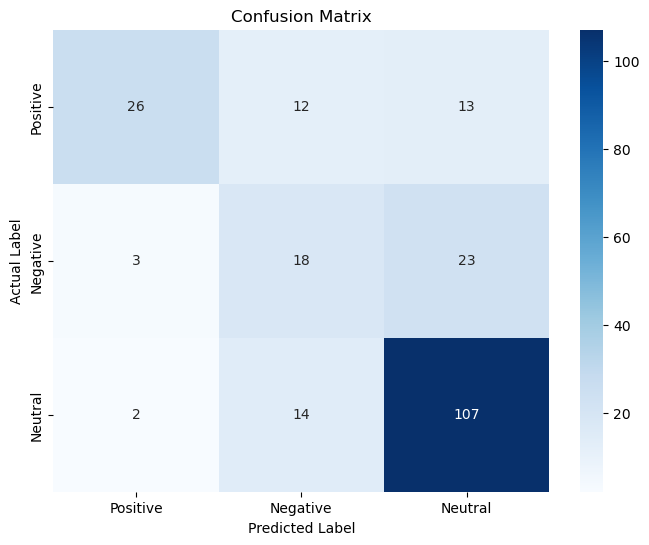

In [92]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_pysentimiento, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix1.png', dpi=300, bbox_inches='tight')

plt.show()

Recall: out of all the sentences that the model predicted, 76% match the test set. F1 shows that the model did a OK job (77%) of predicting the sentiment. Precision - measure how many of the positive predictions made are correct, recall - how many of the positive cases the classifier correctly predicred over all the pos cases - https://www.statology.org/sklearn-classification-report/, https://stephenallwright.com/interpret-f1-score/, https://towardsdatascience.com/a-look-at-precision-recall-and-f1-score-36b5fd0dd3ec


In [93]:
confusion_matrix(sentiment_annotation_list, sentiment_py_list)


array([[ 26,  12,  13],
       [  3,  18,  23],
       [  2,  14, 107]], dtype=int64)

## Corrected lexicon sentiment accuracy

In [94]:
accuracy_score(sentiment_annotation_list,corr_lexicon_sent_score_list)

0.481651376146789

In [95]:
print(classification_report(sentiment_annotation_list, corr_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.37      0.76      0.50        51
           2       0.27      0.32      0.29        44
           3       0.87      0.42      0.57       123

    accuracy                           0.48       218
   macro avg       0.50      0.50      0.45       218
weighted avg       0.63      0.48      0.50       218



In [96]:
import seaborn as sns


In [97]:
lexicon_matrix = confusion_matrix(sentiment_annotation_list, sentiment_py_list)



In [98]:
cm_corrected = confusion_matrix(sentiment_annotation_list, corr_lexicon_sent_score_list)

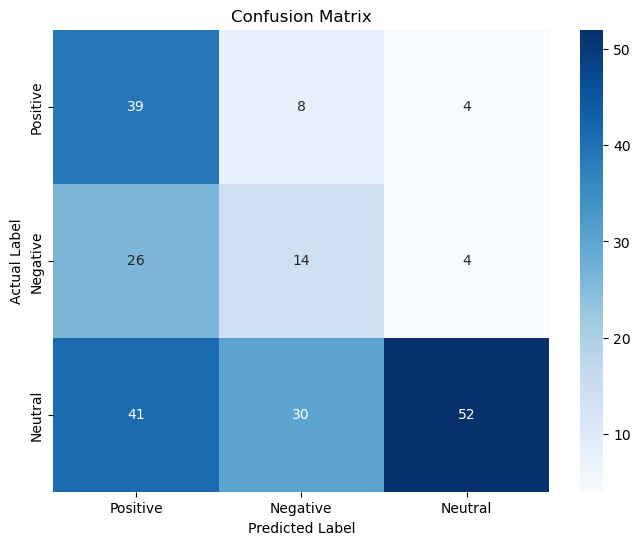

In [99]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_corrected, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix2.png', dpi=300, bbox_inches='tight')

plt.show()

# Manual lexicon sentiment accuracy

In [100]:
accuracy_score(sentiment_annotation_list,manual_lexicon_sent_score_list)

0.47706422018348627

In [101]:
print(classification_report(sentiment_annotation_list, manual_lexicon_sent_score_list))


              precision    recall  f1-score   support

           1       0.37      0.76      0.50        51
           2       0.26      0.32      0.29        44
           3       0.86      0.41      0.56       123

    accuracy                           0.48       218
   macro avg       0.50      0.50      0.45       218
weighted avg       0.63      0.48      0.49       218



In [102]:
confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


array([[39,  8,  4],
       [26, 14,  4],
       [41, 31, 51]], dtype=int64)

In [103]:
cm = confusion_matrix(sentiment_annotation_list, manual_lexicon_sent_score_list)


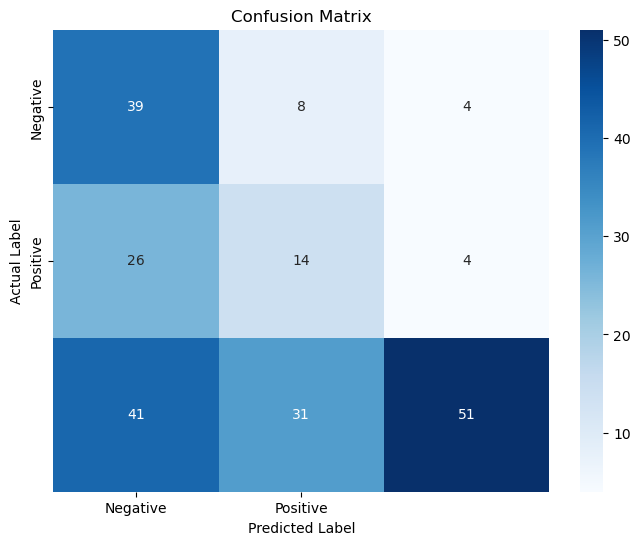

In [104]:
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.show()


## Computational lexicon sentiment accuracy

In [105]:
accuracy_score(sentiment_annotation_list,computational_lexicon_sent_score_list)

0.44036697247706424

In [106]:
print(classification_report(sentiment_annotation_list, computational_lexicon_sent_score_list))

              precision    recall  f1-score   support

           1       0.35      0.76      0.48        51
           2       0.25      0.30      0.27        44
           3       0.85      0.36      0.50       123

    accuracy                           0.44       218
   macro avg       0.48      0.47      0.42       218
weighted avg       0.61      0.44      0.45       218



In [107]:
confusion_matrix(sentiment_annotation_list, computational_lexicon_sent_score_list)


array([[39,  8,  4],
       [27, 13,  4],
       [47, 32, 44]], dtype=int64)

# Emotion lexicon evaluation

In [108]:
df['emotion_annotation'] = df['emotion_annotation'].str.strip()


In [109]:
df_emotion = df[df["emotion_annotation"] != 'no_agreement']


In [110]:
df_emotion = df_emotion[df_emotion["emotion_annotation"] != 'anticipation']


In [111]:
df_emotion = df_emotion[df_emotion["emotion_annotation"] != 'trust']


In [112]:
len(df_emotion)

53

In [113]:
df_emotion

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py        GPT
103        G01Q05  Su tierno corazon, su espiritu admirable, su m...                 POS                joy             FP    1761-09-26_El-Duende-especulativo-sobre-la-v...  AnalyzerOutput(output=POS, probas={POS: 0.922,...  AnalyzerOutput(output=joy, probas={joy: 0.936,...                      0.714286                            0.714286                        0.714286             joy                       POS                     POS                     POS          POS        joy   Positive
113        G01Q11  Huid, Señora, de éstas, y preferid à su comuni...                 NEG               fear             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.807,...  AnalyzerOutput(output=others, probas={others: ...                     -1.000000                           -1.000000                       -1.000000          others                       NEG                     NEG                     NEG          NEG     others  no_rating
116        G01Q14  Una muger hermosa, y entendida nos convence ca...                 POS           surprise             SP   1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...  AnalyzerOutput(output=POS, probas={POS: 0.900,...  AnalyzerOutput(output=joy, probas={joy: 0.493,...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          POS        joy  no_rating
117        G01Q56  Semejantes documentos, apenas se aprenderán en...                 POS         no emotion              S   1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...  AnalyzerOutput(output=NEG, probas={NEG: 0.670,...  AnalyzerOutput(output=others, probas={others: ...                      0.000000                            0.000000                        0.000000          others                       NEU                     NEU                     NEU          NEG     others  no_rating
118        G01Q57  Pero pocas Damas tengo báxo mi direccion, que ...                 POS                joy              S   1788_El-Filósofo-á-la-Moda_Anónimo_Vol-1_Nr-0...  AnalyzerOutput(output=NEG, probas={NEG: 0.971,...  AnalyzerOutput(output=others, probas={others: ...                     -1.000000                           -1.000000                       -1.000000             joy                       NEG                     NEG                     NEG          NEG     others  no_rating
119        G01Q15  Esta parte es la mas dificultosa de todo el ex...                 NEU         no emotion              S   1762-1763_El-Pensador_Joseph-Álvarez-y-Vallad...  AnalyzerOutput(output=NEG, probas={NEG: 0.885,...  AnalyzerOutput(output=others, probas={others: ...                      0.000000                            0.000000                        0.000000          others                       NEU                     NEU                     NEU          NEG     others  no_rating
123        G01Q17  Las quisieron virtuosas, y las tienen virtuosa...                 POS                joy             EX   1763_La-Pensadora-Gaditana_Beatriz-Cienfuegos...  AnalyzerOutput(output=POS, probas={POS: 0.664,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others   Positive
124        G

joy - 1
sadness - 2
anger - 3
disgust - 4
surprise - 5
fear - 6 
no_emotion(others) - 7

In [114]:
df_emotion['emotion_annotation_list'] = df_emotion['emotion_annotation'].replace(['joy','sadness','anger','disgust','surprise','fear','no emotion'],['1','2','3','4','5','6','7'])


In [115]:
emotion_annotation_list = df_emotion['emotion_annotation_list'].tolist()
print(emotion_annotation_list)

['1', '6', '5', '7', '1', '7', '1', '7', '5', '5', '1', '3', '7', '1', '1', '3', '7', '7', '7', '7', '7', '3', '2', '1', '7', '1', '3', '2', '7', '7', '7', '7', '7', '3', '2', '2', '2', '7', '7', '7', '7', '1', '7', '2', '7', '2', '1', '2', '7', '7', '7', '7', '7']


In [116]:
df_emotion['emotion_py_list'] = df_emotion['emotion_py'].replace(['joy','sadness','anger','disgust','surprise','fear','others'],['1','2','3','4','5','6','7'])


In [117]:
emotion_py_list = df_emotion['emotion_py_list'].tolist()
print(emotion_py_list)

['1', '7', '1', '7', '7', '7', '7', '6', '2', '7', '1', '3', '7', '1', '7', '2', '7', '7', '7', '7', '7', '3', '7', '1', '1', '7', '3', '7', '3', '7', '7', '7', '7', '3', '2', '3', '3', '3', '3', '3', '3', '7', '7', '2', '7', '2', '7', '7', '7', '7', '3', '2', '7']


In [118]:
df_emotion['emotion_lexicon_list'] = df_emotion['lexicon_emotion'].replace(['joy','sadness','anger','disgust','surprise','fear','others'],['1','2','3','4','5','6','7'])


In [119]:
emotion_lexicon_list = df_emotion['emotion_lexicon_list'].tolist()
print(emotion_lexicon_list)

['1', '7', '7', '7', '1', '7', '1', '7', '7', '7', '1', '7', '7', '1', '7', '6', '1', '1', '1', '7', '1', '1', '2', '1', '7', '7', '3', '6', '7', '7', '1', '1', '7', '7', '2', '2', '1', '3', '1', '1', '1', '3', '1', '1', '7', '1', '7', '7', '7', '2', '2', '3', '1']


# Emotion Lexicon accuracy

In [120]:
accuracy_score(emotion_annotation_list,emotion_lexicon_list)

0.39622641509433965

In [121]:
print(classification_report(emotion_annotation_list,emotion_lexicon_list))

              precision    recall  f1-score   support

           1       0.29      0.60      0.39        10
           2       0.60      0.38      0.46         8
           3       0.25      0.20      0.22         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.52      0.42      0.47        26

    accuracy                           0.40        53
   macro avg       0.28      0.27      0.26        53
weighted avg       0.43      0.40      0.39        53



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# Pysentimiento emotion accuracy

In [122]:
accuracy_score(emotion_annotation_list,emotion_py_list)

0.5283018867924528

In [123]:
print(classification_report(emotion_annotation_list,emotion_py_list))

              precision    recall  f1-score   support

           1       0.67      0.40      0.50        10
           2       0.50      0.38      0.43         8
           3       0.33      0.80      0.47         5
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         1
           7       0.61      0.65      0.63        26

    accuracy                           0.53        53
   macro avg       0.35      0.37      0.34        53
weighted avg       0.53      0.53      0.51        53



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Saving the df

# GPT sentiment accuracy

In [124]:
df_accuracy_gpt = df_sentiment #[df_sentiment["GPT"] != 'no_agreement']


In [125]:
df_accuracy_gpt

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py        GPT sentiment_annotation_list sentiment_py_list GPT-new corr_lexicon_sent_score_list manual_lexicon_sent_score_list computational_lexicon_sent_score_list
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger   Negative                         3                 3       3                            2                              2                                     2
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others    Neutral                         2                 3       2                            1                              1                                     1
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy   Positive                         1                 1       1                            1                              1                                     1
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others   Positive                         1                 1       1                            1                              1                                     1
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness   Negative                         3                 3       3                            3                              3                                     1
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement   

In [152]:
#condition_a = df['pysentimiento'] != df['polarity_annotation']
condition_gpt = df_accuracy_gpt['GPT-new'] != df_accuracy_gpt['sentiment_annotation_list']

# Apply filters and extract 'sentence' column
#sentences_a = df[condition_a]['sentence']
sentences_gpt = df_accuracy_gpt[condition_gpt][['sentence','polarity_annotation', 'GPT']]
type(sentences_gpt)

pandas.core.frame.DataFrame

In [154]:
condition_py = df_accuracy_gpt['sentiment_py_list'] != df_accuracy_gpt['sentiment_annotation_list']


# Apply filters and extract 'sentence' column
#sentences_a = df[condition_a]['sentence']
sentences_py = df_accuracy_gpt[condition_py][['sentence','polarity_annotation', 'sentiment_py']]
print(sentences_py)

                                              sentence polarity_annotation sentiment_py
1    No es tan facil determinar por dónde se ha de ...                 NEU          NEG
6    Muriò en mis brazos, y en el desorden, en que ...                 NEG          NEU
14   Amigo mio, es defecto de historia pensar de es...                 NEU          NEG
22   porque yo, quando escribo una carta, à excepsi...                 NEG          NEU
24   .¿Pues no há reparado Vm. mi alma (la réplica)...                 POS          NEG
25   Todo esto llevará con paciencia, si su asèo, y...                 NEG          POS
27   Tenía muchissima confianza de mi, como que se ...                 POS          NEU
30   Si esto intentàra, sería un disparate: lo que ...                 NEU          NEG
39   Pero vease â uno de estos tenidos por infelice...                 POS          NEU
43   Esta sábia República tenia establecida la pena...                 POS          NEG
48   Si tal vez sus expresiones 

In [155]:
file_path = 'py-ann_diff1.txt'  # Modify as per your file system
sentences_py.to_csv(file_path, index=False, header=True)

In [140]:
condition_gpt

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10      True
11     False
12     False
13      True
14     False
15     False
16     False
17     False
18     False
19      True
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27      True
28     False
29     False
30     False
31     False
32     False
33     False
34     False
35     False
36     False
37      True
38     False
39     False
40     False
41     False
42     False
43      True
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55      True
56     False
57     False
58     False
59     False
60      True
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70      True
71     False
72     False
73      True
74     False
75     False
76     False

In [126]:
df_accuracy_gpt.columns

Index(['question_code', 'sentence', 'polarity_annotation', 'emotion_annotation', 'narrative_form', 'periodical_name', 'sentiment_pysentimiento', 'emotion_pysentimiento', 'nf_sentiment_lexicon_dispecs', 'nf_sentiment_lexicon_computational', 'nf_sentiment_lexicon_corrected', 'lexicon_emotion', 'manual_lexicon_sent_score', 'comp_lexicon_sent_score', 'corr_lexicon_sent_score', 'sentiment_py', 'emotion_py', 'GPT', 'sentiment_annotation_list', 'sentiment_py_list', 'GPT-new', 'corr_lexicon_sent_score_list', 'manual_lexicon_sent_score_list', 'computational_lexicon_sent_score_list'], dtype='object')

In [127]:
filtered_df = df_accuracy_gpt[df_accuracy_gpt['GPT-new'] == '4']


In [128]:
filtered = filtered_df[['question_code', 'sentence']]

In [129]:
filtered.to_csv('missing_gpt',encoding='latin-1')

In [130]:

print(sentiment_gpt_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '2', '3', '3', '5', '2', '3', '3', '3', '3', '2', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '3', '3', '3', '5', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '2', '3', '3', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '3', '3', '3', '3', '2', '2', '3', '3', '3', '1', '1', '1', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '2', '2', '1', '3', '2', '3', '1', '2', '1', '2', '3', '2', '1', '5', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '4', '3', '3', '3', '1', '3', '2', '2', '1', '1', '3', '2', '2', '3', '2', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '2', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '3', '3', '3', '2', '2', '2', '2', '3', '2', '1', '3', '2', '3', '2', '3', '3', '2', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '1', '1', '3', '1', '3', '3', '3',

In [131]:
sentiment_annotation_list_GPT = df_accuracy_gpt['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [132]:
accuracy_score(sentiment_gpt_list,sentiment_annotation_list_GPT)

0.7614678899082569

In [133]:
print(classification_report(sentiment_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.63      0.82      0.71        39
           2       0.70      0.58      0.64        53
           3       0.84      0.95      0.89       108
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00         3

    accuracy                           0.76       218
   macro avg       0.43      0.47      0.45       218
weighted avg       0.70      0.76      0.72       218



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [134]:
cm_gpt = confusion_matrix(sentiment_gpt_list,sentiment_annotation_list_GPT)

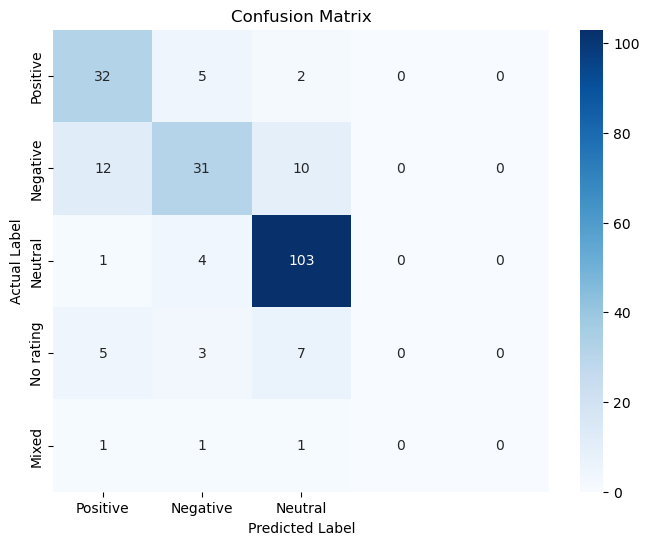

In [135]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral','No rating', 'Mixed'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()


# adding new results

In [136]:
df_accuracy_gpt = df_sentiment[df_sentiment["GPT"] != 'no_agreement']


In [137]:
df_accuracy_gpt

question_code                                           sentence polarity_annotation emotion_annotation narrative_form                                    periodical_name                            sentiment_pysentimiento                              emotion_pysentimiento  nf_sentiment_lexicon_dispecs  nf_sentiment_lexicon_computational  nf_sentiment_lexicon_corrected lexicon_emotion manual_lexicon_sent_score comp_lexicon_sent_score corr_lexicon_sent_score sentiment_py emotion_py        GPT sentiment_annotation_list sentiment_py_list GPT-new corr_lexicon_sent_score_list manual_lexicon_sent_score_list computational_lexicon_sent_score_list
0         G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG       no_agreement             FP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.887,...  AnalyzerOutput(output=anger, probas={anger: 0....                      0.000000                            0.000000                        0.000000             joy                       NEU                     NEU                     NEU          NEG      anger   Negative                         3                 3       3                            2                              2                                     2
1         G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.585,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000          others                       POS                     POS                     POS          NEG     others    Neutral                         2                 3       2                            1                              1                                     1
2         G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS       no_agreement             LB  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.804,...  AnalyzerOutput(output=joy, probas={joy: 0.552,...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS        joy   Positive                         1                 1       1                            1                              1                                     1
3         G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS       no_agreement              D  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=POS, probas={POS: 0.672,...  AnalyzerOutput(output=others, probas={others: ...                      1.000000                            1.000000                        1.000000             joy                       POS                     POS                     POS          POS     others   Positive                         1                 1       1                            1                              1                                     1
4         G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG       no_agreement             SP  1762-1763_El-Pensador_Joseph-Álvarez-y-Vallada...  AnalyzerOutput(output=NEG, probas={NEG: 0.717,...  AnalyzerOutput(output=sadness, probas={sadness...                     -0.333333                            0.333333                       -0.333333         sadness                       NEG                     POS                     NEG          NEG    sadness   Negative                         3                 3       3                            3                              3                                     1
5         G00Q142  Algunas veces me contento con arquear las ceja...                 NEU       no_agreement   

In [138]:
df_accuracy_gpt['GPT'] = df_accuracy_gpt['GPT'].replace(['POS','NEG','NEU'],['1','3','2'])


In [139]:
accuracy_gpt_list = df_accuracy_gpt['GPT'].tolist()
print(accuracy_gpt_list)

['Negative', 'Neutral', 'Positive', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Mixed', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Positive', 'Negative', 'Negative', 'Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Mixed', 'Positive', 'Positive', 'Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Positive', 'Negative', 'Neutral', 'Negative', 'Negative', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Negative', 'Negative', 'Negative', 'Negative', 'Negative', 'Neutral', 'Neutral', 'Negative', 'Negative', 'Negative', 'Positive', 'Positive', 'Positive', 'Negative', 'Negative', 'Neutral', 'Negative', '

In [140]:
sentiment_annotation_list_GPT = df_accuracy_gpt['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [141]:
accuracy_score(accuracy_gpt_list,sentiment_annotation_list_GPT)

0.0

In [142]:
print(classification_report(accuracy_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
       Mixed       0.00      0.00      0.00       3.0
    Negative       0.00      0.00      0.00     108.0
     Neutral       0.00      0.00      0.00      53.0
    Positive       0.00      0.00      0.00      39.0
   no_rating       0.00      0.00      0.00      15.0

    accuracy                           0.00     218.0
   macro avg       0.00      0.00      0.00     218.0
weighted avg       0.00      0.00      0.00     218.0



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\

In [143]:
cm_gpt = confusion_matrix(accuracy_gpt_list,sentiment_annotation_list_GPT)

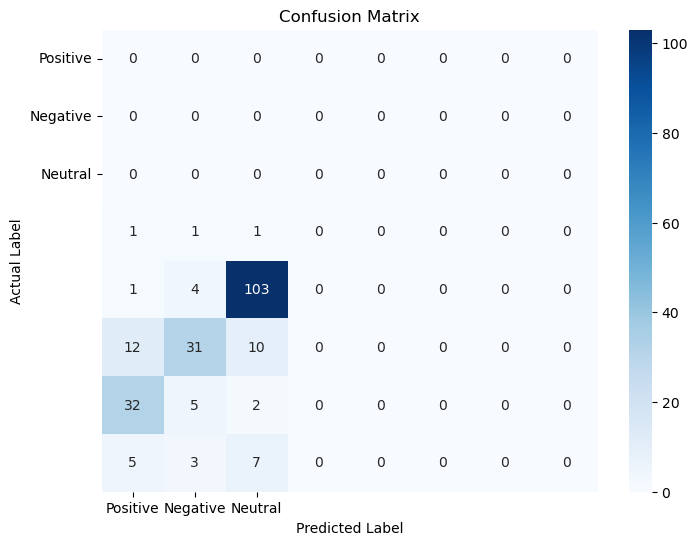

In [144]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()


# adding new results

In [146]:
df_accuracy_gpt3['gpt-3-new'] = df_accuracy_gpt3['Sentiment-GPT3-simple'].replace(['POS','NEG','NEU'],['1','3','2'])


NameError: name 'df_accuracy_gpt3' is not defined

In [147]:
df_accuracy_gpt3

NameError: name 'df_accuracy_gpt3' is not defined

In [148]:
df_accuracy_gpt3.columns

NameError: name 'df_accuracy_gpt3' is not defined

In [149]:
accuracy_gpt_list = df_accuracy_gpt3['gpt-3-new'].tolist()
print(accuracy_gpt_list)

NameError: name 'df_accuracy_gpt3' is not defined

In [150]:
sentiment_annotation_list_GPT = df_accuracy_gpt3['sentiment_annotation_list'].tolist()
print(sentiment_annotation_list_GPT)

NameError: name 'df_accuracy_gpt3' is not defined

In [151]:
accuracy_score(accuracy_gpt_list,sentiment_annotation_list_GPT)

0.0

In [152]:
print(classification_report(accuracy_gpt_list,sentiment_annotation_list_GPT))

              precision    recall  f1-score   support

           1       0.00      0.00      0.00       0.0
           2       0.00      0.00      0.00       0.0
           3       0.00      0.00      0.00       0.0
       Mixed       0.00      0.00      0.00       3.0
    Negative       0.00      0.00      0.00     108.0
     Neutral       0.00      0.00      0.00      53.0
    Positive       0.00      0.00      0.00      39.0
   no_rating       0.00      0.00      0.00      15.0

    accuracy                           0.00     218.0
   macro avg       0.00      0.00      0.00     218.0
weighted avg       0.00      0.00      0.00     218.0



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\

In [153]:
cm_gpt = confusion_matrix(accuracy_gpt_list,sentiment_annotation_list_GPT)

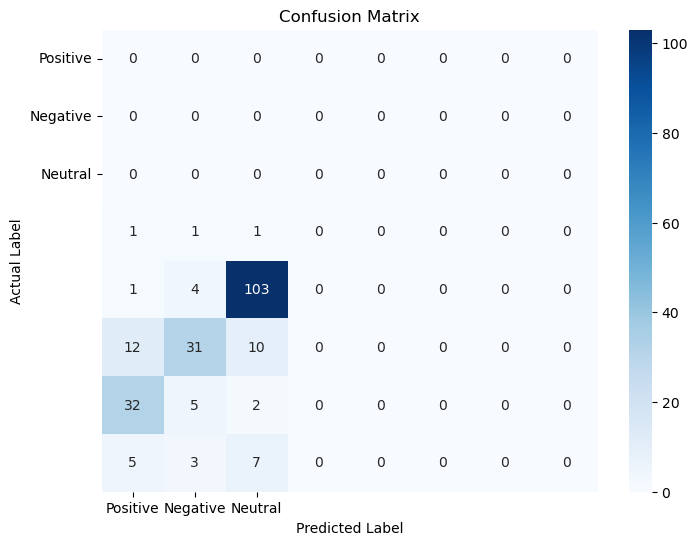

In [154]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix3.png', dpi=300, bbox_inches='tight')
plt.show()


# adding new results

In [155]:
gpt_polarity2 = pd.read_csv('surveys/GPT/gpt3-4.csv', delimiter=';', encoding='utf-8')


In [156]:
gpt_polarity2

Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0        0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                 NEG           NEG         NEG     unknown           NEG
1        1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                 NEU           NEU         NEU         NEU           NEU
2        2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                 POS           NEU         POS         POS           POS
3        3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                 POS           NEU         NEU         POS           NEU
4        4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                 NEG           NEG         NEG     unknown           POS
5        5.0         5.0       G00Q142  Algunas veces me contento con arquear las ceja...                 NEU           NEU         NEG         NEU       unknown
6        6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                 NEG           POS         POS         NEG           NEG
7        7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                 NEG           NEU         NEG     unknown           NEG
8        8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                 NEG           POS         NEG     unknown           POS
9        9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                 NEU           NEU         NEU         NEU           POS
10      10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                 POS           NEU         POS         POS           POS
11      11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                 NEG           NEU         NEG     unknown           NEG
12      12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                 NEG           NEG         NEG     unknown           NEG
13      13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                 NEU           POS         POS     unknown           POS
14      14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                 NEU           NEU         POS         NEU           NEU
15      15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                 NEG           NEU         NEG     unknown           NEG
16      16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                 NEG           NEG         NEG     unknown           NEG
17      17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                 NEG           NEG         NEG     unknown           NEG
18      18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                 NEG           NEG         NEG     unknown           NEG
19      19.0        19.0       G00Q165  Pero será dichoso, y feliz en su estado: no po...                 POS           NEU         POS         POS       unknown
20      20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                 NEG           NEG         NEG     unknown           NEG
21      21.0        21.0       G00Q167  Qué contento me hallaba, no obstante mi fatali...                 POS           POS         POS         POS           POS
22      22.0        22.0       G00Q168  porque yo, quando escribo una carta, à excepsi...                 NEG           NEU         NEG         NEG           NEG
23      23.0        23.0       G00Q171  ¡valgate Dios por nombre, que aún assi engendr...                 NEG        

In [157]:
gpt_polarity2.dropna(inplace=True)

In [158]:
gpt_polarity2 = gpt_polarity2.reset_index()

In [159]:
type(gpt_polarity2)

pandas.core.frame.DataFrame

In [160]:
gpt_polarity2.shape

(218, 10)

In [161]:
gpt_polarity2['polarity_annotation'] = gpt_polarity2['polarity_annotation'].replace(['POS','NEG','NEU', 'unknown'],['1','3','2','4'])

In [162]:
gpt_polarity2['polarity_annotation'] = gpt_polarity2['polarity_annotation'].str.strip()

In [163]:
GPT3_advanced = gpt_polarity2 #[gpt_polarity2["GPT3-advanced"] != 'unknown']

In [164]:
GPT3_advanced 

index  Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0        0      0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                   3           NEG         NEG     unknown           NEG
1        1      1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                   2           NEU         NEU         NEU           NEU
2        2      2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                   1           NEU         POS         POS           POS
3        3      3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                   1           NEU         NEU         POS           NEU
4        4      4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                   3           NEG         NEG     unknown           POS
5        5      5.0         5.0       G00Q142  Algunas veces me contento con arquear las ceja...                   2           NEU         NEG         NEU       unknown
6        6      6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                   3           POS         POS         NEG           NEG
7        7      7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                   3           NEU         NEG     unknown           NEG
8        8      8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                   3           POS         NEG     unknown           POS
9        9      9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                   2           NEU         NEU         NEU           POS
10      10     10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                   1           NEU         POS         POS           POS
11      11     11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                   3           NEU         NEG     unknown           NEG
12      12     12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                   3           NEG         NEG     unknown           NEG
13      13     13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                   2           POS         POS     unknown           POS
14      14     14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                   2           NEU         POS         NEU           NEU
15      15     15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                   3           NEU         NEG     unknown           NEG
16      16     16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                   3           NEG         NEG     unknown           NEG
17      17     17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                   3           NEG         NEG     unknown           NEG
18      18     18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                   3           NEG         NEG     unknown           NEG
19      19     19.0        19.0       G00Q165  Pero será dichoso, y feliz en su estado: no po...                   1           NEU         POS         POS       unknown
20      20     20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                   3           NEG         NEG     unknown           NEG
21      21     21.0        21.0       G00Q167  Qué contento me hallaba, no obstante mi fatali...                   1           POS         POS         POS           POS
22      22     22.0        22.0       G00Q168  porque yo, quando escribo una carta, à excepsi...                   3  

In [165]:
GPT3_advanced = GPT3_advanced.reset_index()

In [166]:
GPT3_advanced.shape

(218, 11)

In [167]:
GPT3_advanced['GPT3-advanced'] = GPT3_advanced ['GPT3-advanced'].replace(['POS','NEG','NEU', 'unknown'],['1','3','2','4'])

In [168]:
GPT3_advanced_list = GPT3_advanced['GPT3-advanced'].tolist()
print(GPT3_advanced_list)

['3', '2', '2', '2', '3', '2', '1', '2', '1', '2', '2', '2', '3', '1', '2', '2', '3', '3', '3', '2', '3', '1', '2', '3', '2', '1', '3', '2', '2', '3', '2', '3', '2', '3', '2', '3', '2', '1', '2', '1', '2', '2', '1', '1', '3', '3', '1', '2', '3', '3', '3', '2', '3', '2', '2', '2', '2', '3', '2', '3', '1', '2', '3', '2', '2', '2', '3', '2', '3', '1', '3', '3', '2', '2', '3', '3', '3', '2', '1', '1', '1', '2', '1', '2', '3', '2', '2', '1', '1', '2', '3', '2', '2', '2', '2', '2', '2', '2', '3', '1', '2', '2', '3', '1', '3', '2', '2', '2', '2', '2', '2', '1', '4', '3', '1', '2', '2', '2', '1', '1', '2', '2', '3', '2', '1', '2', '1', '1', '1', '3', '2', '1', '2', '2', '1', '2', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '2', '2', '1', '2', '4', '2', '1', '2', '2', '1', '1', '1', '3', '2', '3', '2', '2', '2', '2', '1', '1', '3', '3', '1', '3', '2', '2', '3', '2', '2', '3', '3', '2', '1', '3', '1', '1', '2', '3', '3', '3', '3', '3', '1', '2', '2', '3', '2', '1', '2', '2', '2', '3', '1',

In [169]:
polarity_annotation_list = GPT3_advanced['polarity_annotation'].tolist()
print(polarity_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [170]:
accuracy_score(GPT3_advanced_list,polarity_annotation_list)

0.4541284403669725

In [171]:
print(classification_report(GPT3_advanced_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.43      0.49      0.46        45
           2       0.57      0.23      0.33       109
           3       0.42      0.85      0.57        61
           4       0.00      0.00      0.00         3

    accuracy                           0.45       218
   macro avg       0.36      0.39      0.34       218
weighted avg       0.49      0.45      0.42       218



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [172]:
cm_gpt3_adv = confusion_matrix(GPT3_advanced_list,polarity_annotation_list)

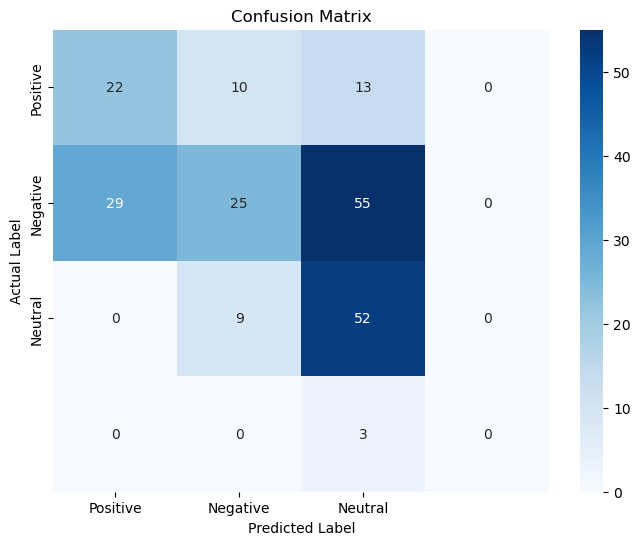

In [173]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt3_adv, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()


In [174]:
GPT4_advanced = gpt_polarity2 #[gpt_polarity2["GPT4-advanced"] != 'unknown']

In [175]:
GPT4_advanced.reset_index() 

level_0  index  Column1  Unnamed: 0 question_code                                           sentence polarity_annotation GPT3-advanced GPT3-simple GPT4-simple GPT4-advanced
0          0      0      0.0         0.0       G00Q136  Miralos sin humanidad, y como esclavos, y ello...                   3           NEG         NEG     unknown           NEG
1          1      1      1.0         1.0       G00Q138  No es tan facil determinar por dónde se ha de ...                   2           NEU         NEU         NEU           NEU
2          2      2      2.0         2.0       G00Q139  Tù debes acordarte de la ternura, con que se p...                   1           NEU         POS         POS           POS
3          3      3      3.0         3.0       G00Q140  Alli estarà mas tranquilo, y podrà vivir à su ...                   1           NEU         NEU         POS           NEU
4          4      4      4.0         4.0       G00Q141  Confiesso à Vm. que yá no puedo sufrir la vida...                   3           NEG         NEG     unknown           POS
5          5      5      5.0         5.0       G00Q142  Algunas veces me contento con arquear las ceja...                   2           NEU         NEG         NEU       unknown
6          6      6      6.0         6.0       G00Q143  Muriò en mis brazos, y en el desorden, en que ...                   3           POS         POS         NEG           NEG
7          7      7      7.0         7.0       G00Q146  Quisiera Vm. que yo dijera, que esto propriame...                   3           NEU         NEG     unknown           NEG
8          8      8      8.0         8.0       G00Q147                         ¿no hay Dios que castigue?                   3           POS         NEG     unknown           POS
9          9      9      9.0         9.0       G00Q149  Ahora bien, yo no pretendo llevar las cosas al...                   2           NEU         NEU         NEU           POS
10        10     10     10.0        10.0       G00Q150  Que vivan contentos, y felices todos los hombr...                   1           NEU         POS         POS           POS
11        11     11     11.0        11.0       G00Q151  Si hablo mucho, si con todos me rio, si me bur...                   3           NEU         NEG     unknown           NEG
12        12     12     12.0        12.0       G00Q153  Añada Vm. à esto, que tenia una porcion de def...                   3           NEG         NEG     unknown           NEG
13        13     13     13.0        13.0       G00Q154  Yo sè que su caracter es de amar, y desear lo ...                   2           POS         POS     unknown           POS
14        14     14     14.0        14.0       G00Q155  Amigo mio, es defecto de historia pensar de es...                   2           NEU         POS         NEU           NEU
15        15     15     15.0        15.0       G00Q161  Grande es este golpe, no lo niego; pero mayor ...                   3           NEU         NEG     unknown           NEG
16        16     16     16.0        16.0       G00Q162  Tan flaca, y consumida, que parecía retrato de...                   3           NEG         NEG     unknown           NEG
17        17     17     17.0        17.0       G00Q163  ¿qué otro empleo la dán mas, que obligarla à c...                   3           NEG         NEG     unknown           NEG
18        18     18     18.0        18.0       G00Q164  Ni tantos ancianos, que en la mas estrecha ang...                   3           NEG         NEG     unknown           NEG
19        19     19     19.0        19.0       G00Q165  Pero será dichoso, y feliz en su estado: no po...                   1           NEU         POS         POS       unknown
20        20     20     20.0        20.0       G00Q166  No està en esto la gracia, sino es que apenas ...                   3           NEG         NEG     unknown           NEG
21        21     21     21.0        21.0       G00Q167  Qué contento me hallaba, no obsta

In [176]:
GPT4_advanced['GPT4-advanced'] = GPT4_advanced ['GPT4-advanced'].replace(['POS','NEG','NEU', 'unknown'],['1','3','2','4'])

In [177]:
GPT4_advanced_list = GPT4_advanced['GPT4-advanced'].tolist()
print(GPT4_advanced_list)

['3', '2', '1', '2', '1', '4', '3', '3', '1', '1', '1', '3', '3', '1', '2', '3', '3', '3', '3', '4', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '2', '3', '3', '3', '3', '2', '3', '3', '3', '3', '4', '3', '1', '3', '4', '1', '3', '2', '3', '3', '1', '1', '3', '3', '2', '3', '1', '3', '3', '3', '2', '1', '3', '3', '3', '1', '1', '2', '3', '3', '3', '3', '4', '1', '2', '1', '2', '3', '1', '3', '1', '3', '2', '3', '1', '3', '1', '2', '3', '3', '1', '3', '3', '1', '3', '3', '4', '3', '1', '2', '3', '2', '3', '1', '1', '2', '3', '4', '3', '3', '1', '1', '2', '2', '1', '1', '1', '2', '1', '3', '1', '1', '2', '3', '1', '2', '2', '2', '2', '2', '2', '3', '1', '3', '2', '1', '3', '3', '3', '1', '3', '3', '2', '1', '3', '3', '2', '2', '3', '1', '3', '2', '1', '3', '2', '3', '3', '3', '3', '1', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '3', '3', '3', '3', '3', '3', '1', '3', '3', '3', '2', '1', '3', '2', '3', '3', '3',

In [178]:
polarity_annotation_list = GPT4_advanced['polarity_annotation'].tolist()
print(polarity_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [179]:
accuracy_score(GPT4_advanced_list,polarity_annotation_list)

0.7201834862385321

In [180]:
print(classification_report(GPT4_advanced_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.69      0.60      0.64        58
           2       0.48      0.55      0.51        38
           3       0.82      0.88      0.85       115
           4       0.00      0.00      0.00         7

    accuracy                           0.72       218
   macro avg       0.50      0.51      0.50       218
weighted avg       0.70      0.72      0.71       218



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [181]:
cm_gpt4_adv = confusion_matrix(GPT4_advanced_list,polarity_annotation_list)

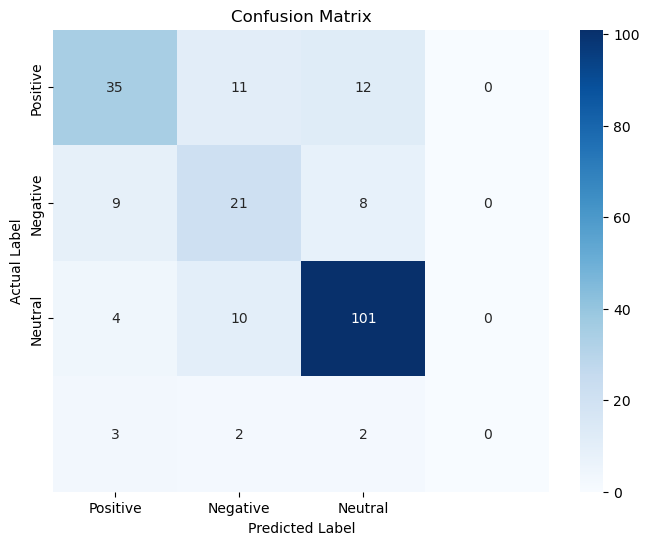

In [182]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt4_adv, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()


In [183]:
GPT4_simple = gpt_polarity2 #[gpt_polarity2["GPT4-simple"] != 'unknown']

In [184]:
GPT4_simple = GPT4_simple.reset_index()

In [185]:
GPT4_simple.shape

(218, 11)

In [186]:
GPT4_simple['GPT4-simple'] = GPT4_simple['GPT4-simple'].replace(['POS','NEG','NEU','unknown'],['1','3','2','4'])

In [187]:
GPT4_simple_list = GPT4_simple['GPT4-simple'].tolist()
print(GPT4_simple_list)

['4', '2', '1', '1', '4', '2', '3', '4', '4', '2', '1', '4', '4', '4', '2', '4', '4', '4', '4', '1', '4', '1', '3', '4', '1', '4', '4', '1', '3', '4', '4', '4', '4', '4', '3', '4', '4', '1', '1', '1', '4', '4', '3', '2', '4', '4', '3', '2', '2', '4', '4', '4', '4', '4', '4', '1', '4', '4', '1', '3', '1', '4', '3', '4', '3', '4', '4', '2', '4', '4', '2', '4', '4', '4', '4', '4', '4', '4', '1', '1', '1', '4', '2', '3', '4', '1', '1', '4', '1', '1', '4', '1', '2', '1', '2', '3', '3', '1', '3', '1', '2', '4', '3', '1', '4', '4', '3', '2', '2', '1', '3', '1', '2', '4', '2', '2', '1', '2', '2', '2', '3', '4', '4', '1', '4', '1', '1', '1', '1', '4', '2', '2', '2', '4', '1', '1', '4', '1', '2', '2', '2', '2', '2', '2', '4', '4', '3', '1', '4', '4', '3', '2', '1', '3', '3', '1', '4', '4', '4', '2', '2', '2', '2', '4', '3', '1', '3', '1', '4', '2', '4', '1', '4', '4', '4', '4', '4', '1', '1', '1', '4', '4', '4', '2', '3', '4', '4', '4', '3', '4', '2', '3', '4', '1', '1', '4', '1', '3', '4', '4',

In [188]:
polarity_annotation_list = GPT4_simple['polarity_annotation'].tolist()
print(polarity_annotation_list)

['3', '2', '1', '1', '3', '2', '3', '3', '3', '2', '1', '3', '3', '2', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '3', '1', '3', '3', '2', '3', '3', '3', '3', '3', '3', '1', '1', '1', '3', '3', '3', '1', '3', '3', '3', '3', '2', '3', '3', '3', '3', '1', '3', '1', '3', '3', '1', '3', '1', '3', '3', '1', '1', '3', '3', '2', '3', '3', '2', '3', '3', '3', '2', '3', '3', '3', '1', '1', '2', '3', '3', '2', '3', '1', '1', '2', '1', '1', '3', '1', '3', '1', '3', '3', '3', '1', '2', '1', '2', '3', '2', '1', '3', '3', '3', '3', '3', '2', '3', '1', '3', '3', '2', '1', '1', '1', '1', '2', '3', '3', '3', '1', '3', '2', '3', '2', '1', '3', '1', '2', '3', '3', '1', '1', '3', '2', '2', '2', '2', '2', '2', '2', '3', '3', '3', '3', '1', '3', '3', '1', '1', '3', '1', '1', '3', '3', '3', '3', '2', '2', '2', '3', '2', '1', '2', '2', '3', '1', '3', '3', '3', '3', '3', '3', '3', '2', '2', '1', '3', '2', '3', '3', '3', '3', '3', '3', '3', '1', '2', '3', '3', '2', '1', '3', '1', '3', '3', '2',

In [189]:
accuracy_score(GPT4_simple_list,polarity_annotation_list)

0.38073394495412843

In [190]:
print(classification_report(GPT4_simple_list,polarity_annotation_list))

              precision    recall  f1-score   support

           1       0.75      0.73      0.74        52
           2       0.52      0.55      0.53        42
           3       0.18      0.73      0.29        30
           4       0.00      0.00      0.00        94

    accuracy                           0.38       218
   macro avg       0.36      0.50      0.39       218
weighted avg       0.30      0.38      0.32       218



C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\krusic\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [191]:
cm_gpt4_simple = confusion_matrix(GPT4_simple_list,polarity_annotation_list)

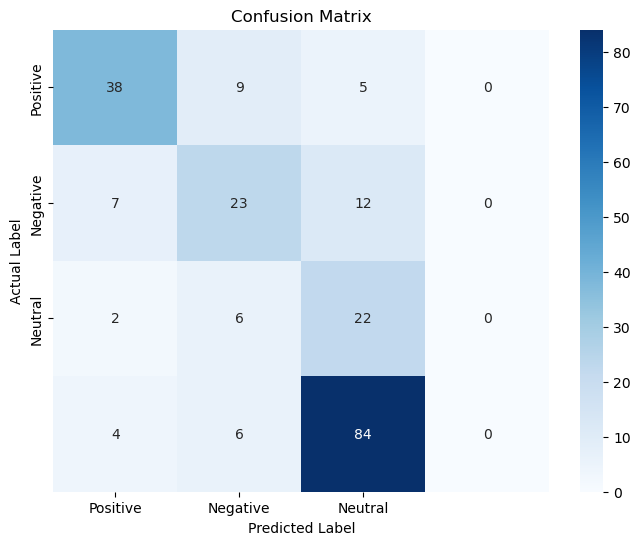

In [192]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt4_simple, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
GPT3_simple = gpt_polarity2 #[gpt_polarity2["GPT3-simple"] != 'unknown']

In [ ]:
GPT3_simple = GPT3_simple.reset_index()

In [ ]:
GPT3_simple.shape

In [ ]:
GPT3_simple['GPT3-simple'] = GPT3_simple['GPT3-simple'].replace(['POS','NEG','NEU', 'unknown'],['1','3','2','4'])

In [ ]:
GPT3_simple_list = GPT3_simple['GPT3-simple'].tolist()
print(GPT3_simple_list)

In [ ]:
len(GPT3_simple_list)

In [ ]:
polarity_annotation_list = GPT3_simple['polarity_annotation'].tolist()
print(polarity_annotation_list)

In [ ]:
accuracy_score(GPT3_simple_list,polarity_annotation_list)

In [ ]:
print(classification_report(GPT3_simple_list,polarity_annotation_list))

In [ ]:
cm_gpt3_simple = confusion_matrix(GPT3_simple_list,polarity_annotation_list)

In [ ]:
plt.figure(figsize=(8,6))
sns.heatmap(cm_gpt3_simple, annot=True, fmt='d', cmap='Blues', xticklabels=['Positive', 'Negative', 'Neutral'], yticklabels=['Positive', 'Negative', 'Neutral'])
plt.title('Confusion Matrix')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')
plt.savefig('confusion_matrix_gpt_adv.png', dpi=300, bbox_inches='tight')
plt.show()
